In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [123]:
dataset=pd.read_csv("Basepaper-dataset.csv")
dataset.head()

,#location,X,Y,Z,label(location+activity)
0,1,0.060410,-0.382996,-0.925644,14
1,1,0.047729,-0.405075,-0.921341,14
2,1,0.063873,-0.401993,-0.922760,14
3,1,0.021912,-0.461716,-0.915222,14
4,1,0.022583,-0.421509,-1.008743,14


In [124]:
dataset.shape

(338670, 5)

In [125]:
x=dataset.iloc[:, [1,2,3]].values
y=dataset.iloc[:,4].values

In [126]:
x

array([[ 0.06040955, -0.38299561, -0.92564392],
       [ 0.04772949, -0.40507507, -0.92134094],
       [ 0.06387329, -0.4019928 , -0.92276001],
       ...,
       [ 0.395966  , -0.105927  , -0.94371   ],
       [ 0.391464  , -0.103165  , -0.916107  ],
       [ 0.354965  , -0.166489  , -0.761658  ]])

# Count plot

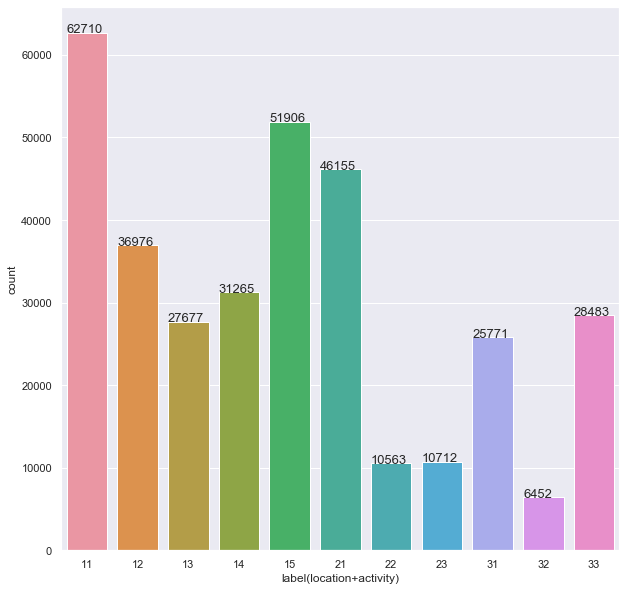

In [73]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="label(location+activity)", data=dataset)
for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(), s=str(i.get_height()),fontsize=13)

# count plot according to location

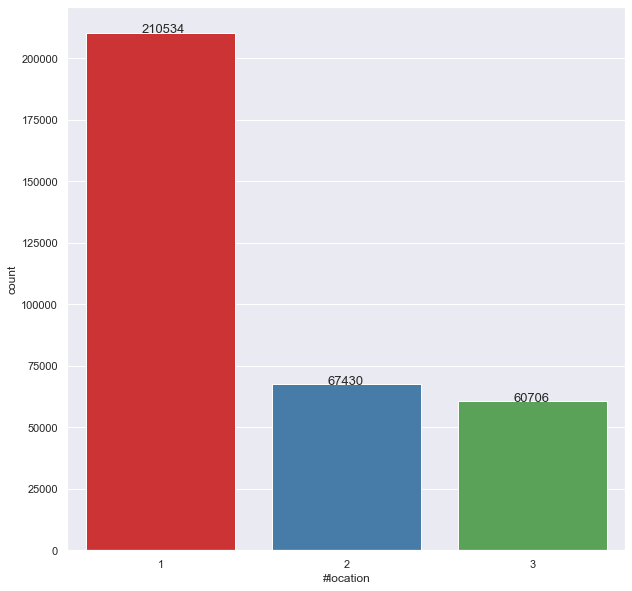

In [74]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x="#location", data=dataset,palette="Set1")
for i in ax.patches:
  ax.text(x=i.get_x()+0.3,y=i.get_height(), s=str(i.get_height()),fontsize=13)

# Box plot

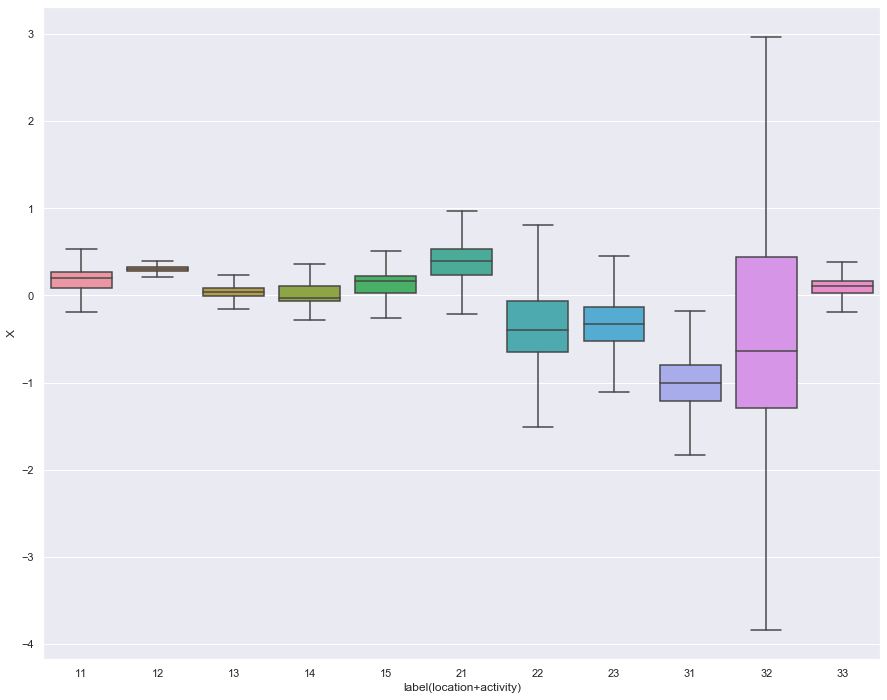

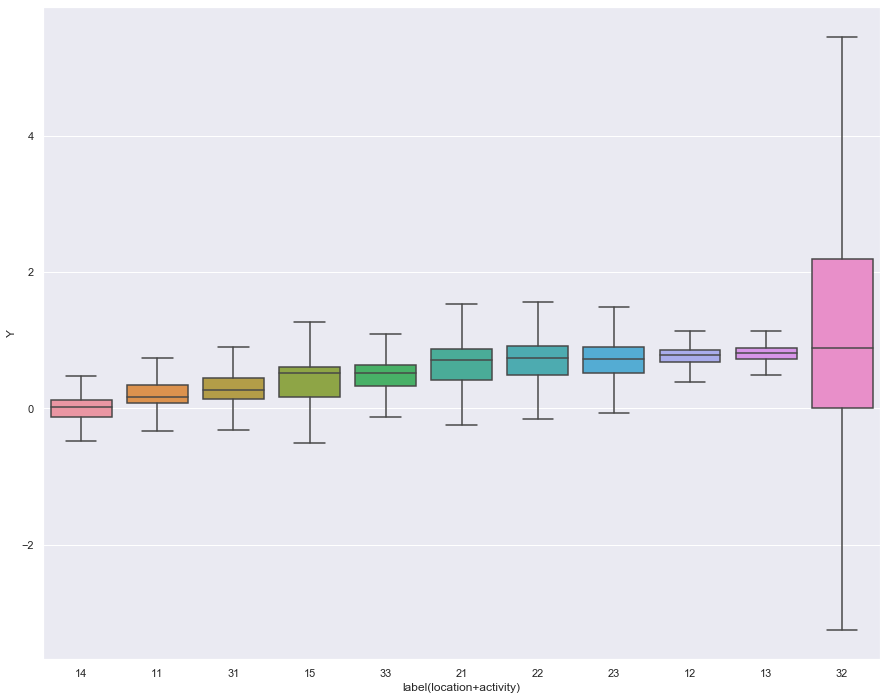

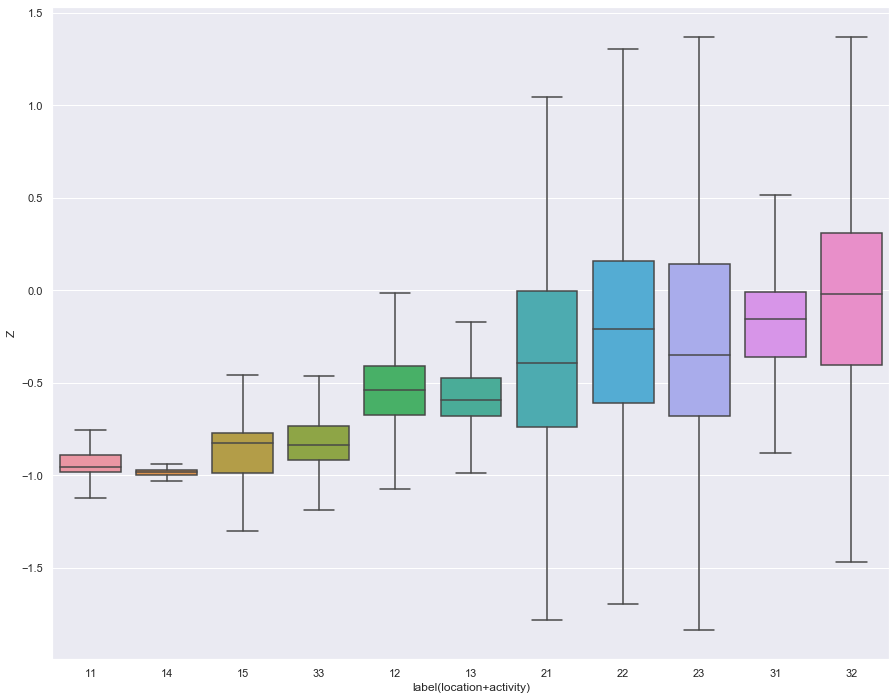

In [75]:
sns.set(rc={'figure.figsize':(15,12)})
labels=["Office work","Reading","Writing","Taking a Rest","Playing a game","Eating","Cooking","Washing dishes",'walking',  'running',"taking a transport"]
ax = sns.boxplot(x="label(location+activity)", y="X", data=dataset,showfliers=False)
plt.show()

sns.set(rc={'figure.figsize':(15,12)})
ax = sns.boxplot(x="label(location+activity)", y="Y", data=dataset,showfliers=False,order=[14,11,31,15,33,21,22,23,12,13,32])
plt.show()

sns.set(rc={'figure.figsize':(15,12)})
ax = sns.boxplot(x="label(location+activity)", y="Z", data=dataset,showfliers=False,order=[11,14,15,33,12,13,21,22,23,31,32])
plt.show()

In [127]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)


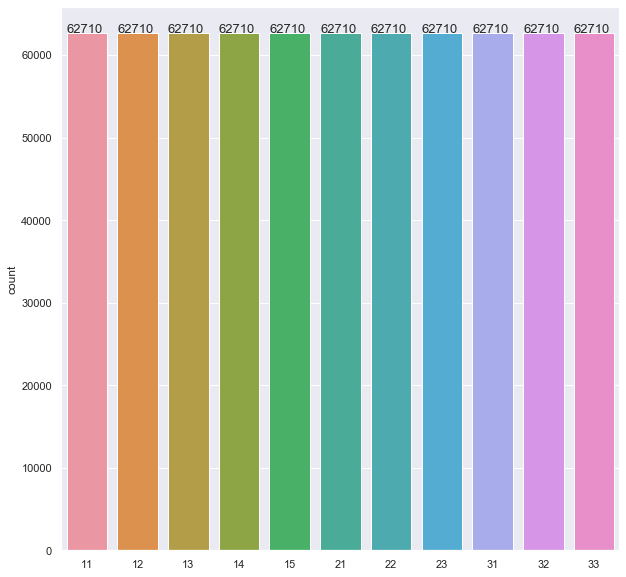

In [128]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x=y)
for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(), s=str(i.get_height()),fontsize=13)

##### without location

In [129]:
accuracy=[]

In [169]:
#svm accuracy taken from collab
accuracy.append(0.69)

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


###### Decision tree

In [131]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

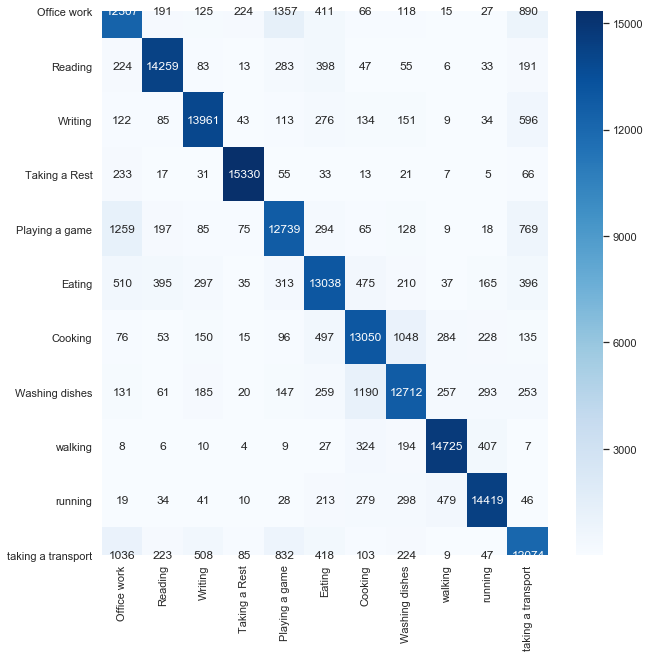

In [132]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
labels=["Office work","Reading","Writing","Taking a Rest","Playing a game","Eating","Cooking","Washing dishes",'walking',  'running',"taking a transport"]
sns.heatmap(cm,cmap="Blues",fmt='d',annot=True,xticklabels=labels,yticklabels=labels)

In [133]:
from sklearn import metrics 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
Accuracy_d=metrics.accuracy_score(y_test, y_pred)
Precision_d=precision_score(y_test,y_pred, average='weighted')
Recall_d=recall_score(y_test, y_pred, average='weighted')
f1_score_d=f1_score(y_test, y_pred, average='weighted')

In [134]:
Accuracy_d

0.8617652345856552

In [170]:
accuracy.append(Accuracy_d)

# Random forest classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'gini', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [137]:
y_pred = classifier.predict(x_test)

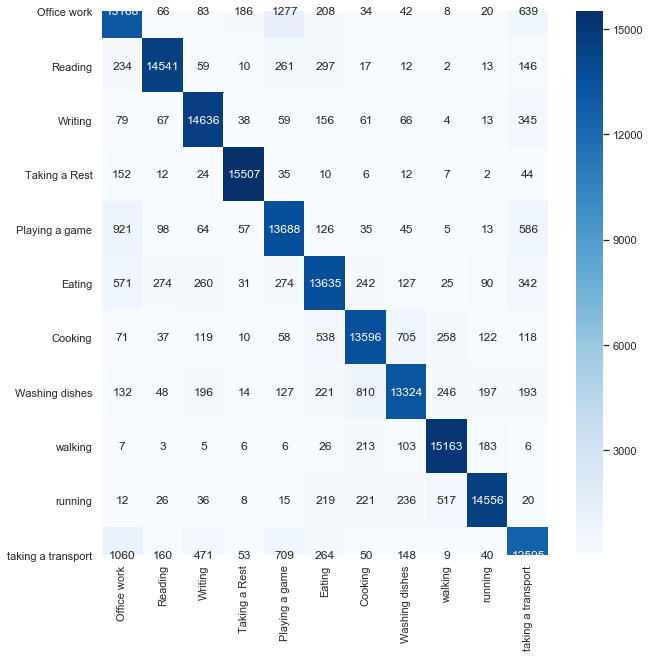

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels=["Office work","Reading","Writing","Taking a Rest","Playing a game","Eating","Cooking","Washing dishes",'walking',  'running',"taking a transport"]
sns.heatmap(cm,cmap="Blues",fmt='.0f',annot=True,xticklabels=labels,yticklabels=labels)

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Accuracy_r=accuracy_score(y_test,y_pred)
Precision_r=precision_score(y_test,y_pred, average='weighted')
Recall_r=recall_score(y_test, y_pred, average='weighted')
f1_score_r=f1_score(y_test, y_pred, average='weighted')

In [140]:
Accuracy_r

0.8953685931819104

In [172]:
accuracy.append(Accuracy_r)

###### ANN

In [142]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from imblearn.over_sampling import SMOTE

In [143]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y = np.array(y)
y

array([ 3,  3,  3, ..., 10, 10, 10], dtype=int64)

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [146]:
model = Sequential()
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(11,kernel_initializer='glorot_normal',activation = "softmax"))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [147]:
history =  model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
517357/517357 [==============================] - 112s 216us/step - loss: 0.8588 - accuracy: 0.6908
Epoch 2/10
517357/517357 [==============================] - 110s 212us/step - loss: 0.7772 - accuracy: 0.7178
Epoch 3/10
517357/517357 [==============================] - 107s 208us/step - loss: 0.7579 - accuracy: 0.7253
Epoch 4/10
517357/517357 [==============================] - 107s 207us/step - loss: 0.7452 - accuracy: 0.7289
Epoch 5/10
517357/517357 [==============================] - 110s 212us/step - loss: 0.7351 - accuracy: 0.7331
Epoch 6/10
517357/517357 [==============================] - 107s 207us/step - loss: 0.7292 - accuracy: 0.7353
Epoch 7/10
517357/517357 [==============================] - 108s 208us/step - loss: 0.7266 - accuracy: 0.7357
Epoch 8/10
517357/517357 [==============================] - 108s 209us/step - loss: 0.7224 - accuracy: 0.7372
Epoch 9/10
517357/517357 [==============================] - 108s 209us/step - loss: 0.7178 - accuracy: 0.7388
Epoch 10/1

In [153]:
accuracy_a=model.evaluate(x_test,y_test)[1]
accuracy_a

172453/172453 [==============================] - 9s 53us/step


0.7435359358787537

In [173]:
accuracy.append(accuracy_a)

In [174]:
accuracy

[0.69, 0.8617652345856552, 0.8953685931819104, 0.7435359358787537]

# with location

In [99]:
accuracyl=[]

In [100]:
dataset1=pd.read_csv("rawData1.csv")
dataset1.head()

,#location,X,Y,Z,label(location+activity)
0,1,0.060410,-0.382996,-0.925644,14
1,1,0.047729,-0.405075,-0.921341,14
2,1,0.063873,-0.401993,-0.922760,14
3,1,0.021912,-0.461716,-0.915222,14
4,1,0.022583,-0.421509,-1.008743,14


In [101]:
x1=dataset1.iloc[:, [0,1,2,3]].values
y1=dataset1.iloc[:,4].values

In [103]:
oversample = SMOTE()
x1,y1 = oversample.fit_resample(x1,y1)


In [104]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=0)


In [105]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x1_train,y1_train)
y1_predd = clf.predict(x1_test)

In [106]:


Accuracy_d1=accuracy_score(y1_test,y1_predd)
Precision_d1=precision_score(y1_test,y1_predd, average='weighted')
Recall_d1=recall_score(y1_test, y1_predd, average='weighted')
f1_score_d1=f1_score(y1_test, y1_predd, average='weighted')

In [107]:
Accuracy_d1

0.9248722840426087

In [108]:
accuracyl.append(Accuracy_d1)

In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'gini', random_state = 0)
classifier.fit(x1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [110]:
y1_pred = classifier.predict(x1_test)

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Accuracy_r1=accuracy_score(y1_test,y1_pred)
Precision_r1=precision_score(y1_test,y1_pred, average='weighted')
Recall_r1=recall_score(y1_test, y1_pred, average='weighted')
f1_score_r1=f1_score(y1_test, y1_pred, average='weighted')

In [112]:
Accuracy_r1

0.9470116495508921

In [113]:
accuracyl.append(Accuracy_r1)

# ANN

In [115]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y1 = labelencoder_y.fit_transform(y1)
y1 = np.array(y1)
y1

array([ 3,  3,  3, ..., 10, 10, 10], dtype=int64)

In [116]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=0)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)

In [118]:
model = Sequential()
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dense(256,kernel_initializer='glorot_normal',activation = "relu"))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(11,kernel_initializer='glorot_normal',activation = "softmax"))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [119]:
history =  model.fit(x1_train,y1_train,epochs = 10)

Epoch 1/10
517357/517357 [==============================] - 107s 208us/step - loss: 0.4499 - accuracy: 0.8131
Epoch 2/10
517357/517357 [==============================] - 108s 209us/step - loss: 0.3931 - accuracy: 0.8349
Epoch 3/10
517357/517357 [==============================] - 106s 204us/step - loss: 0.3806 - accuracy: 0.8409
Epoch 4/10
517357/517357 [==============================] - 105s 203us/step - loss: 0.3721 - accuracy: 0.8440
Epoch 5/10
517357/517357 [==============================] - 107s 206us/step - loss: 0.3668 - accuracy: 0.8465
Epoch 6/10
517357/517357 [==============================] - 107s 206us/step - loss: 0.3647 - accuracy: 0.8484
Epoch 7/10
517357/517357 [==============================] - 109s 211us/step - loss: 0.3608 - accuracy: 0.8496
Epoch 8/10
517357/517357 [==============================] - 108s 209us/step - loss: 0.3582 - accuracy: 0.8503
Epoch 9/10
517357/517357 [==============================] - 108s 209us/step - loss: 0.3565 - accuracy: 0.8509
Epoch 10/1

In [120]:
model.evaluate(x1_test,y1_test)[1]

172453/172453 [==============================] - 10s 56us/step


0.8530324101448059

In [121]:
accuracy_a1=model.evaluate(x1_test,y1_test)[1]

172453/172453 [==============================] - 10s 57us/step


In [154]:
accuracyl.append(accuracy_a1)

In [175]:
accuracyl

['0.83', '0.92', '0.95', '0.85']

In [179]:

accuracy = [ '%.2f' % elem for elem in accuracy ]
accuracyl = [ '%.2f' % elem for elem in accuracyl]

In [180]:
accuracy

['0.69', '0.86', '0.90', '0.74']

In [181]:
accuracy=[float(i) for i in accuracy]

In [182]:
accuracyl=[float(i) for i in accuracyl]

In [183]:
accuracy

[0.69, 0.86, 0.9, 0.74]

In [184]:
accuracyl

[0.83, 0.92, 0.95, 0.85]

In [12]:
accuracyl=[0.83,0.90,0.92,0.87]

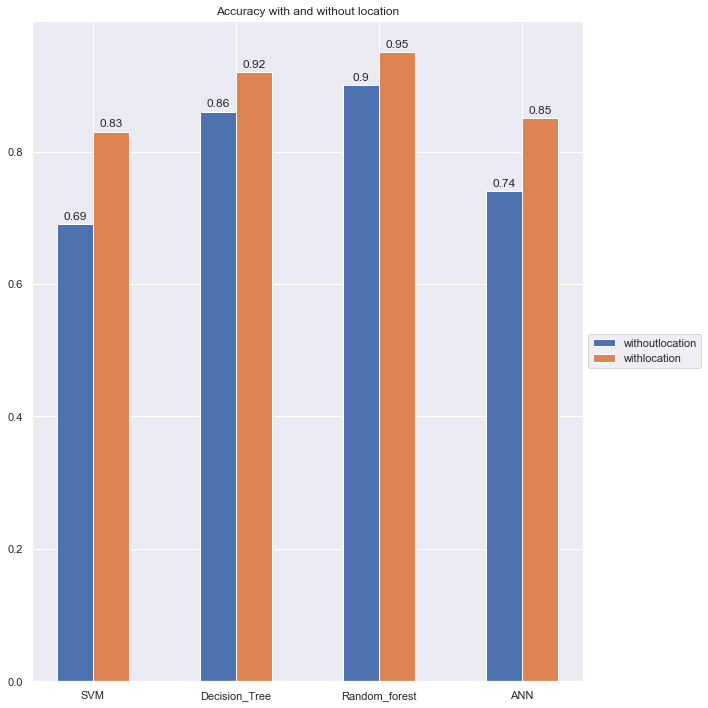

In [185]:



labels = ['SVM', 'Decision_Tree','Random_forest','ANN']

x = np.arange(len(labels))  # the label locations
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x -0.5*width, accuracy, width, label='withoutlocation')
rects2 = ax.bar(x +0.5*width, accuracyl,width, label='withlocation')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Accuracy with and without location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()